In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Serial Processing Time: 0.39 milliseconds


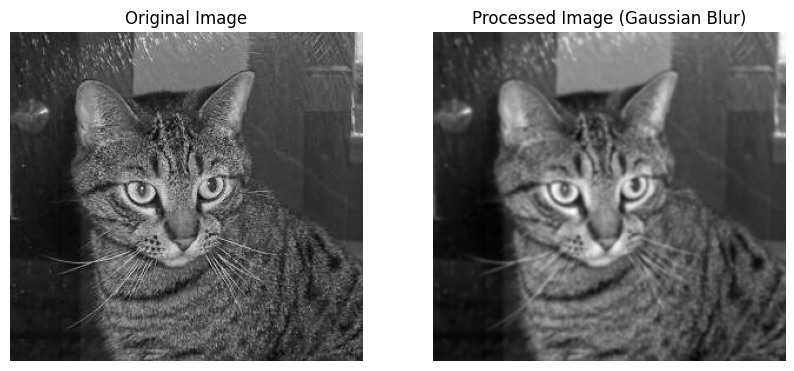

In [ ]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('/content/drive/MyDrive/dataset/train/cat.1.jpg', 0)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

start_time = time.time()

# Apply Gaussian blur serially
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Time taken for the serial approach in milliseconds
elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
print(f'Serial Processing Time: {elapsed_time:.2f} milliseconds')

# Display the processed image (after Gaussian blur)
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Processed Image (Gaussian Blur)")
plt.axis('off')

# Show the original and processed images
plt.show()


# Serial

Processed 10 images in 104.65 milliseconds
Processed 100 images in 13573.34 milliseconds
Processed 250 images in 2432.28 milliseconds
Processed 500 images in 4744.46 milliseconds
Processed 1000 images in 9424.73 milliseconds


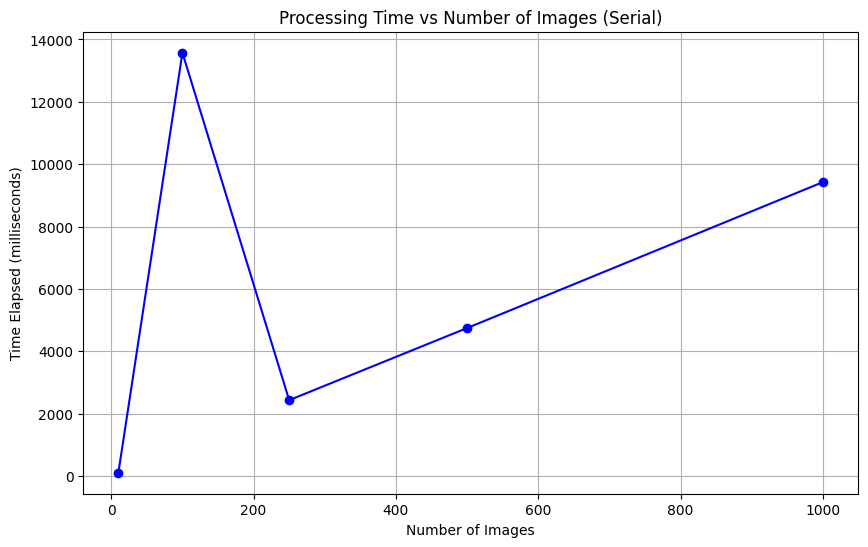

In [20]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory containing image files
image_directory = '/content/drive/MyDrive/dataset/train'

# List all image files in the directory
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png', '.tif'))]

# Function to process images and measure time
def process_images(image_files):
    start_time = time.time()

    for i, image_file in enumerate(image_files):
        # Read the image in grayscale
        image = cv2.imread(image_file, 0)

        if image is None:
            print(f"Error reading image {image_file}")
            continue

        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
    return elapsed_time

# List of image counts to process
image_counts = [10, 100, 250, 500, 1000]

# List to store the results
results = []

# Process images in batches
for count in image_counts:
    elapsed_time = process_images(image_files[:count])
    results.append((count, elapsed_time))
    print(f'Processed {count} images in {elapsed_time:.2f} milliseconds')

# Plotting the results
image_counts, elapsed_times = zip(*results)

plt.figure(figsize=(10, 6))
plt.plot(image_counts, elapsed_times, marker='o', linestyle='-', color='b')
plt.title('Processing Time vs Number of Images (Serial)')
plt.xlabel('Number of Images')
plt.ylabel('Time Elapsed (milliseconds)')
plt.grid(True)
plt.show()


# Parallel

Processed 10 images in 206.31 milliseconds
Processed 100 images in 1023.73 milliseconds
Processed 250 images in 2309.36 milliseconds
Processed 500 images in 4541.10 milliseconds
Processed 1000 images in 9354.01 milliseconds


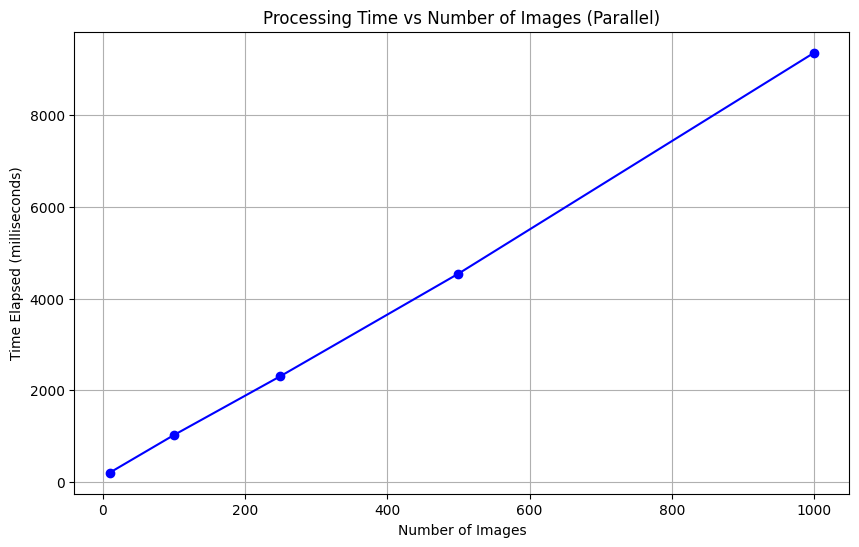

In [21]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count

# Directory containing image files
image_directory = '/content/drive/MyDrive/dataset/train'

# List all image files in the directory
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png', '.tif'))]

# Function to apply Gaussian blur to a single image
def apply_gaussian_blur(image_file):
    # Read the image in grayscale
    image = cv2.imread(image_file, 0)

    if image is None:
        print(f"Error reading image {image_file}")
        return None

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

# Function to process images in parallel and measure time
def process_images_parallel(image_files):
    start_time = time.time()

    # Create a pool of workers
    num_workers = cpu_count()
    with Pool(num_workers) as pool:
        pool.map(apply_gaussian_blur, image_files)

    elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
    return elapsed_time

# List of image counts to process
image_counts = [10, 100, 250, 500, 1000]

# List to store the results
results = []

# Process images in batches
for count in image_counts:
    elapsed_time = process_images_parallel(image_files[:count])
    results.append((count, elapsed_time))
    print(f'Processed {count} images in {elapsed_time:.2f} milliseconds')

# Plotting the results
image_counts, elapsed_times = zip(*results)

plt.figure(figsize=(10, 6))
plt.plot(image_counts, elapsed_times, marker='o', linestyle='-', color='b')
plt.title('Processing Time vs Number of Images (Parallel)')
plt.xlabel('Number of Images')
plt.ylabel('Time Elapsed (milliseconds)')
plt.grid(True)
plt.show()


# Speedup

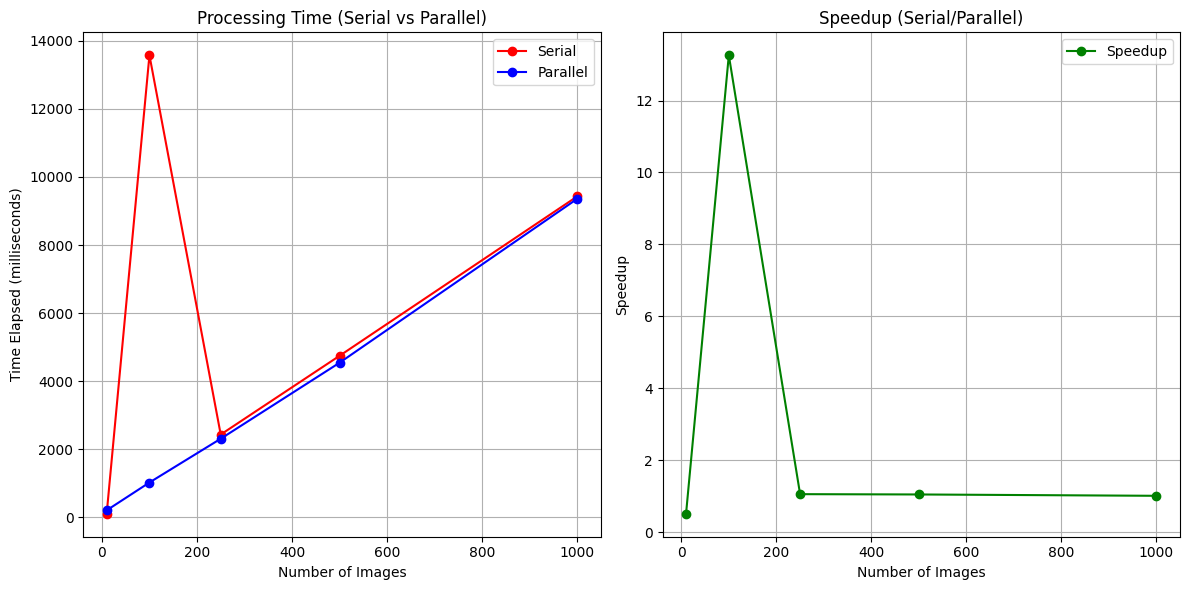

Serial Processing Times (milliseconds):
10 images: 104.65 milliseconds
100 images: 13573.34 milliseconds
250 images: 2432.28 milliseconds
500 images: 4744.46 milliseconds
1000 images: 9424.73 milliseconds

Parallel Processing Times (milliseconds):
10 images: 206.31 milliseconds
100 images: 1023.73 milliseconds
250 images: 2309.36 milliseconds
500 images: 4541.10 milliseconds
1000 images: 9354.01 milliseconds

Speedup (Serial/Parallel):
10 images: 0.51x speedup
100 images: 13.26x speedup
250 images: 1.05x speedup
500 images: 1.04x speedup
1000 images: 1.01x speedup


In [26]:
import matplotlib.pyplot as plt

# Data for serial processing times (milliseconds)
serial_times = [104.65, 13573.34, 2432.28, 4744.46, 9424.73]

# Data for parallel processing times (milliseconds)
parallel_times = [206.31, 1023.73, 2309.36, 4541.10, 9354.01]

# Number of images processed
image_counts = [10, 100, 250, 500, 1000]

# Calculate speedup (serial time / parallel time)
speedup = [s / p for s, p in zip(serial_times, parallel_times)]

# Plotting the speedup
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(image_counts, serial_times, marker='o', linestyle='-', color='r', label='Serial')
plt.plot(image_counts, parallel_times, marker='o', linestyle='-', color='b', label='Parallel')
plt.title('Processing Time (Serial vs Parallel)')
plt.xlabel('Number of Images')
plt.ylabel('Time Elapsed (milliseconds)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(image_counts, speedup, marker='o', linestyle='-', color='g', label='Speedup')
plt.title('Speedup (Serial/Parallel)')
plt.xlabel('Number of Images')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the numeric values
print("Serial Processing Times (milliseconds):")
for count, time in zip(image_counts, serial_times):
    print(f"{count} images: {time:.2f} milliseconds")

print("\nParallel Processing Times (milliseconds):")
for count, time in zip(image_counts, parallel_times):
    print(f"{count} images: {time:.2f} milliseconds")

print("\nSpeedup (Serial/Parallel):")
for count, s in zip(image_counts, speedup):
    print(f"{count} images: {s:.2f}x speedup")
